## **Choosing appropriate features for the model**

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os


In [54]:
# Load dataset
data_path =r"/Users/rosepeterfunja/Tanzania_KIC/Assignment/machine-learning-linear-regression-rhysrose/data/processed_data.csv"
df = pd.read_csv(data_path)

# Display first few rows
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-1.181835,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.339119
1,-1.083307,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0.085301
2,-1.083395,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0.952967
3,-1.061131,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0.902087
4,-0.915522,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.006959


medv       1.000000
rm         0.473184
b          0.354118
zn         0.292621
dis        0.214585
chas       0.100435
rad       -0.274205
tax       -0.368919
age       -0.390567
nox       -0.392400
ptratio   -0.392604
crim      -0.395536
indus     -0.421711
lstat     -0.686268
Name: medv, dtype: float64


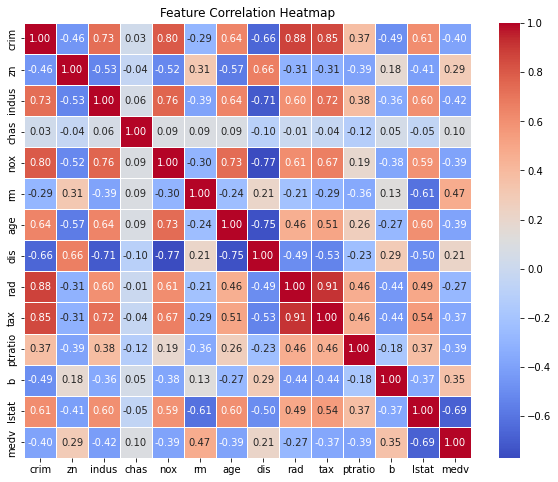

In [55]:
#Check Correlation with Target Variable

# Compute correlation with the target variable
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["medv"].sort_values(ascending=False)

# Display correlation values
print(correlation_with_target)

# Plot heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



In [56]:
# Remove Highly Correlated Features (Multicollinearity)

# Define correlation threshold
corr_threshold = 0.8

# Get upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify features to drop
drop_features = [column for column in upper.columns if any(upper[column] > corr_threshold)]

# Drop highly correlated features
df_selected = df.drop(columns=drop_features)

print("Dropped features due to multicollinearity:", drop_features)


Dropped features due to multicollinearity: ['rad', 'tax']


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Define X and y
X = df_selected.drop(columns=["medv"])
y = df_selected["medv"]

# Replace inf/-inf with NaN
X = X.replace([np.inf, -np.inf], np.nan)
y = y.replace([np.inf, -np.inf], np.nan)

# Combine X and y temporarily to drop any row with NaN
df_clean = pd.concat([X, y], axis=1)
df_clean = df_clean.dropna()

# Separate cleaned X and y
X = df_clean.drop(columns=["medv"])
y = df_clean["medv"]

# Optional: Check again to confirm clean
print("Any NaNs in X?", X.isnull().any().any())
print("Any NaNs in y?", y.isnull().any())
print("Any Infs in X?", np.isinf(X).any().any())
print("Any Infs in y?", np.isinf(y).any())

# Now standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the clean data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Confirm shape match
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Feature importance
feature_importance = np.abs(model.coef_)
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Display top 5
selected_features = feature_importance_df["Feature"].head(5).tolist()
print("Selected features for the model:", selected_features)

# Save if needed
feature_importance_df.to_csv("feature_importance.csv", index=False)


Any NaNs in X? False
Any NaNs in y? False
Any Infs in X? False
Any Infs in y? False
X_train shape: (345, 11)
y_train shape: (345,)
Selected features for the model: ['lstat', 'nox', 'dis', 'ptratio', 'b']


In [62]:
import joblib

# Save the model
joblib.dump(model, '/Users/rosepeterfunja/Tanzania_KIC/Assignment/machine-learning-linear-regression-rhysrose/models/linear_regression_model.pkl')

['/Users/rosepeterfunja/Tanzania_KIC/Assignment/machine-learning-linear-regression-rhysrose/models/linear_regression_model.pkl']

In [64]:
#Save the test data for model evaluation

# Convert to DataFrames (important to add column names back to X)

X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_test_df = pd.DataFrame(y_test, columns=["medv"])

# Save to CSV
X_test_df.to_csv("/Users/rosepeterfunja/Tanzania_KIC/Assignment/machine-learning-linear-regression-rhysrose/data/X_test.csv", index=False)
y_test_df.to_csv("/Users/rosepeterfunja/Tanzania_KIC/Assignment/machine-learning-linear-regression-rhysrose/data/y_test.csv", index=False)

